In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


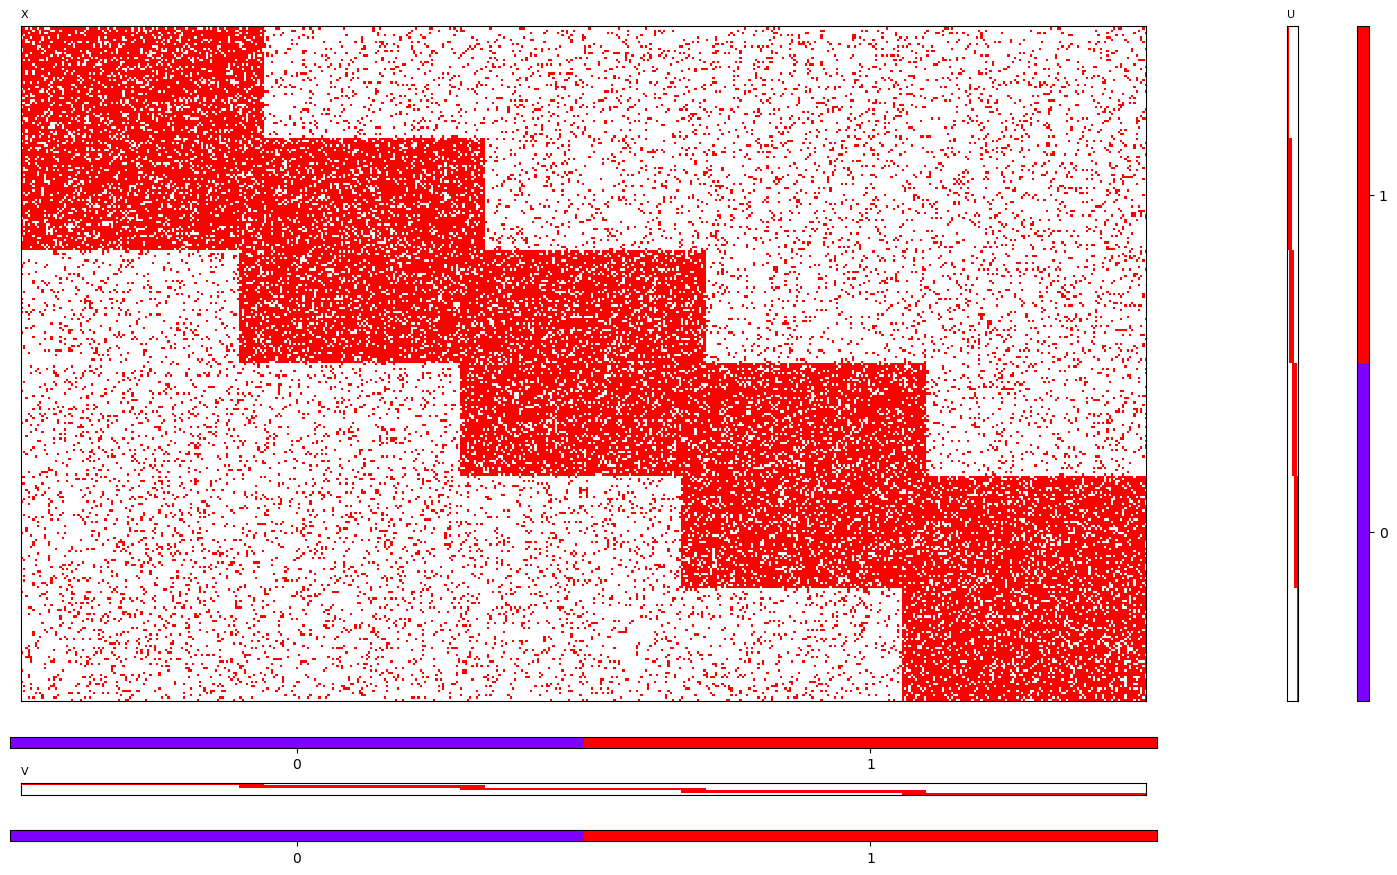

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)
# tau = 0.3

data.generate(seed=1000)
data.add_noise(noise=[0.2, 0.1], seed=2000)
tau = 0.5

data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1717344919
[I]   train_size   : 52798
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1717344919


In [5]:
# # choosing proper tau

# from models import Asso

# model = Asso(k=5, tau=0.30, w=0.25)
# model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)
# settings = [(self.assoc, [0, 0], 'assoc'), (self.basis, [0, 1], 'basis')]
# self.show_matrix(settings, colorbar=True, clim=[0, 1], title=f'tau: {self.tau}')

In [8]:
from models import Asso

k = 15
# tau is decided above

# w_list = [0.005, 0.010, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
# w_list = [0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46, 0.48, 0.50, 0.52, 0.54, 0.56, 0.58, 0.60]
w_list = [0.3, 0.35, 0.4, 0.45, 0.48, 0.5, 0.52, 0.55]

# models = []

# for w in w_list:
#     model = Asso(k=k, tau=tau, w=w)
#     model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)

#     models.append(model)

In [8]:
from utils import description_length

In [9]:
# xs = []
# TPRs = []
# FPRs = []
# DLs = []
# ws = []
# ERRs = []

# for model in models:
#     if 'updates' in model.logs:
#         xs.append(model.logs['updates']['']['']['k'])
#         DLs.append(model.logs['updates']['train'][0]['DL'])
#         TPRs.append(model.logs['updates']['train'][0]['Recall'])
#         FPRs.append(model.logs['updates']['train'][0]['FPR'])
#         ws.append(model.w)
#         ERRs.append(model.logs['updates']['train'][0]['ERR'])

In [10]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# cmap = cm.get_cmap('rainbow', len(ws))

In [11]:
# plt.figure(1, dpi=200) ##############################################

# for i in range(len(ws)):
#     plt.plot(xs[i], TPRs[i], '-o', color=cmap(i))
#     plt.plot(xs[i], FPRs[i], '--o', color=cmap(i))
#     # plt.plot(xs[i], DLs[i], '--*', color=cmap(i))

# plt.ylim(0, 1)
# plt.grid(True)
# plt.title(f'recall (coverage, tpr) & overcoverage (fpr)')
# plt.xlabel('pattern')
# plt.ylabel('metrics')

# legends = []
# for w in ws:
#     legends.append('TPR, w{}'.format(w))
#     legends.append('FPR, w{}'.format(w))
#     # legends.append('DL, w{}'.format(w))

# plt.legend(legends, loc='lower right')

In [12]:
# plt.figure(2, dpi=200) ##############################################

# for i in range(len(ws)):
#     plt.plot(xs[i], TPRs[i] / FPRs[i], '--*', color=cmap(i))

# plt.ylim(0, None)
# plt.grid(True)
# # plt.title(f'desc len')
# # plt.xlabel('pattern')
# # plt.ylabel('desc len')

# legends = []
# for w in ws:
#     legends.append('TP/FP, w{}'.format(w))

# plt.legend(legends, loc='lower right')

In [13]:
# plt.figure(4, dpi=200) ##############################################

# for i in range(len(ws)):
#     plt.plot(xs[i], DLs[i], '--*', color=cmap(i))

# plt.ylim(0, None)
# plt.grid(True)
# plt.title(f'desc len')
# plt.xlabel('pattern')
# plt.ylabel('desc len')

# legends = []
# for w in ws:
#     legends.append('DL, w{}'.format(w))

# plt.legend(legends, loc='lower right')

In [14]:
# plt.figure(3, dpi=200) ##############################################

# for i in range(len(ws)):
#     plt.plot(xs[i], DLs[i], '--*', color=cmap(i))

# plt.ylim(0, None)
# plt.grid(True)
# plt.title(f'desc len')
# plt.xlabel('pattern')
# plt.ylabel('desc len')

# legends = []
# for w in ws:
#     legends.append('DL, w{}'.format(w))

# plt.legend(legends, loc='lower right')

Start from saved models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


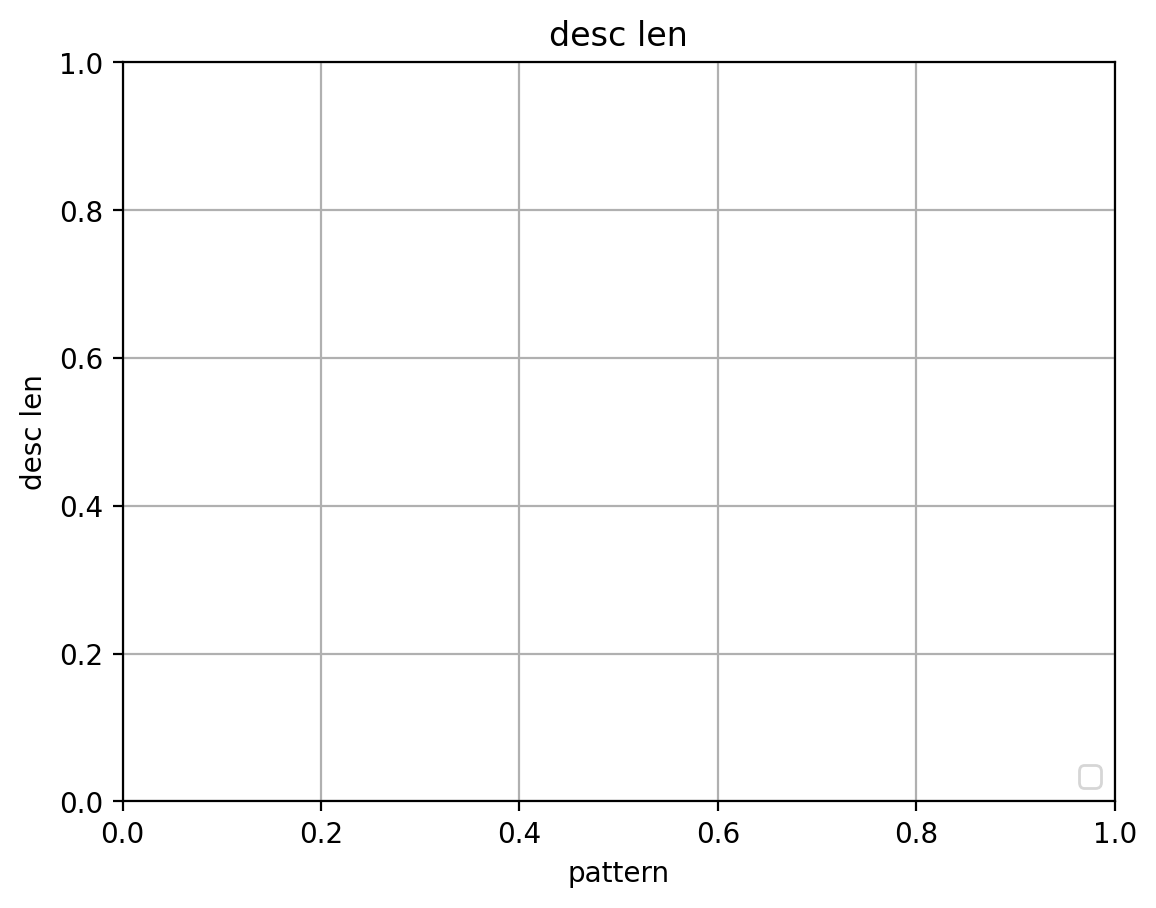

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import pickle, os
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('rainbow', len(w_list))

path = '../saved_models/'
extension = 'pickle'

file_list = []

# time_start = datetime.strptime("24-05-16 09:00", '%y-%m-%d %H:%M')
# time_end = datetime.strptime("24-05-16 13:00", '%y-%m-%d %H:%M')
time_start = datetime.strptime("24-05-20 11:57", '%y-%m-%d %H:%M')
time_end = datetime.strptime("24-05-20 12:00", '%y-%m-%d %H:%M')

for file in os.listdir(path):
    if file.endswith(extension):
        file_path = os.path.join(path, file)
        t = datetime.fromtimestamp(os.path.getctime(file_path))
        if time_end >= t >= time_start:
            file_list.append(file_path)
            # print(file_path, t)

models = []

for file in file_list:
    with open(file, 'rb') as f:
        m = pickle.load(f)
    models.append(m)

# compute discription length with varying w's
from utils import description_length
import numpy as np
    
xs = []
TPRs = []
FPRs = []
DLs = []
ws = []

for model in models:
    DL = []
    for k in range(model['U'].shape[1]):
        dl = description_length(
            gt=model['X_train'], 
            U=model['U'][:, :k+1], 
            V=model['V'][:, :k+1], 
            w_model=1.0, 
            w_fp=1, #model['w'], 
            w_fn=1, #1-model['w']
            )
        DL.append(dl)
    DL = np.array(DL)

    xs.append(model['logs']['updates']['']['']['k'])
    # DLs.append(model.logs['updates']['train'][0]['DL'])
    DLs.append(DL)
    ws.append(model['w'])

plt.figure(1, dpi=200) ##############################################

for i in range(len(ws)):
    # plt.plot(xs[i], DLs[i] - 1000 * i, '--*', color=cmap(i))
    plt.plot(xs[i], DLs[i], '--*', color=cmap(i))

# plt.ylim(0, None)
plt.grid(True)
plt.title(f'desc len')
plt.xlabel('pattern')
plt.ylabel('desc len')

legends = []
for w in ws:
    legends.append('DL, w{}'.format(w))

plt.legend(legends, loc='lower right')